In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.decomposition import PCA
import numpy as np

# AutoEncoder で抽出した特徴ベクトルを PCA にかける

### メモ

- attention なしだと累積寄与率が1%程度上昇
    ただし、attenntion ありの方が分離がうまく行っているように見える…
    
- 第0～2成分までは、タイトルの文字数に対する相関が強い（当然か…）
    学習もまず文字数から合わせにいっている様子だし
   

### TODO

- unit数を減らして自由度を減らす（文字数に相関の強い成分が多いので）

    -> unit = 50, layer = 2 まで減らすと、文字数への相関を第0成分に
       押し込めることができたように見える

データセットの数: 1000, 特徴量の次元: 200
カテゴリの数: 66
レイヤごとの分散: [0.73944002, 0.69760078]
30までの累積寄与率: 0.3826037645339966


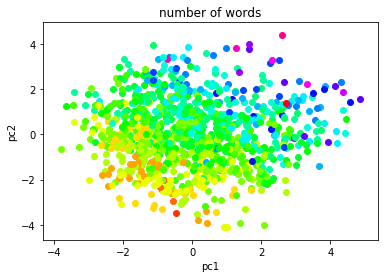

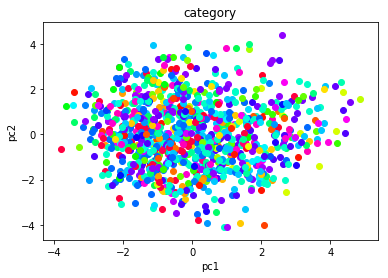

In [13]:
import pickle
import matplotlib.cm as cm

n = 30
pkl_file = 'result/vector.pkl'
cnt_file = 'data_test_/test_cnt.txt'
cat_file = 'data_test_/test_cat.txt'

# pkl file の情報
with open(pkl_file, 'rb') as f:
    vectors = pickle.load(f)

print('データセットの数: {}, 特徴量の次元: {}'.\
      format(vectors.shape[0], vectors.shape[1]))

# category file の情報
with open(cat_file, 'r') as f:
    cat_list = [line for line in f.readlines()[:vectors.shape[0]]]
    n_cat = len(set(cat_list))
print('カテゴリの数: {}'.format(n_cat))

# word count file の情報
with open(cnt_file, 'r') as f:
    cnt_list = [int(line) for line in f.readlines()[:vectors.shape[0]]]
    
# encoder のどのレイヤの h が重要か調べる
vs = np.split(np.array(vectors), 2, axis=1)
stds = [np.std(v) for v in vs]
print('レイヤごとの分散: {}'.format(stds))
    
# 主成分分析する
pca = PCA(n_components=n)
pca.fit(vectors)
pca_vectors = pca.fit_transform(vectors)


# 主成分の寄与率を出力する
#print('各次元の寄与率: {0}'.format(pca.explained_variance_ratio_))
print('{0}までの累積寄与率: {1}'.\
      format(n, sum(pca.explained_variance_ratio_)))

# カテゴリごとに色を指定する
cat_colors = {}
for i, cat in enumerate(set(cat_list)):
    cat_colors[cat] = float(i/n_cat)

# 主成分をプロットする
pc1 = 0
pc2 = 1

for v, c in zip(pca_vectors, cnt_list):
    plt.scatter(v[pc1], v[pc2],
                color=cm.hsv(float(c/max(cnt_list))))
    
plt.title('number of words')
plt.xlabel('pc1')
plt.ylabel('pc2')
plt.show()
    
for v, c in zip(pca_vectors, cat_list):
    plt.scatter(v[pc1], v[pc2],
                color=cm.hsv(cat_colors[c]))
    
plt.title('category')
plt.xlabel('pc1')
plt.ylabel('pc2')
plt.show()


# まずは PCA のテスト

In [ ]:


iris = datasets.load_iris()

print(iris.data.shape)
#print(iris.target)

# 主成分分析する
pca = PCA(n_components=2)
pca.fit(iris.data)

transformed = pca.fit_transform(iris.data)
#print(iris.data)
#print(transformed)
print(transformed.shape)

# 主成分をプロットする
for label in np.unique(iris.target):
    plt.scatter(transformed[iris.target == label, 0],
                transformed[iris.target == label, 1])

plt.title('principal component')
plt.xlabel('pc1')
plt.ylabel('pc2')

# 主成分の寄与率を出力する
print('各次元の寄与率: {0}'.format(pca.explained_variance_ratio_))
print('累積寄与率: {0}'.format(sum(pca.explained_variance_ratio_)))

# グラフを表示する
plt.show()